# Андрест Владислав ИУ5-65Б
# Рубежный контроль №1
**Вариант 2**

Анализ набора данных *Wine dataset* с использованием методов машинного обучения. Выполнено в рамках учебной дисциплины.

## Задание

1. Провести **корреляционный анализ** признаков набора данных Wine.
2. При наличии пропущенных значений — удалить соответствующие строки или столбцы.
3. Сделать выводы о возможности построения моделей машинного обучения и вкладе признаков в модель.
4. Построить **парные диаграммы** (для группы ИУ5-65Б).

**Источник данных**: [Wine Dataset — sklearn.datasets.load_wine](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html)

## Шаг 1: Загрузка и первичный анализ данных

Импортируем библиотеки, загрузим данные, посмотрим общую структуру и первые строки.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine

# Загружаем набор данных Wine
wine = load_wine()
wine_df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
wine_df['target'] = wine.target

# Общая информация о данных
print(wine_df.info())

# Первые 5 строк
print(wine_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

## Шаг 2: Проверка на пропущенные значения

In [2]:
# Проверка на пропущенные значения
print("\nКоличество пропущенных значений по колонкам:")
print(wine_df.isnull().sum())


Количество пропущенных значений по колонкам:
alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64


3. Корреляционный анализ

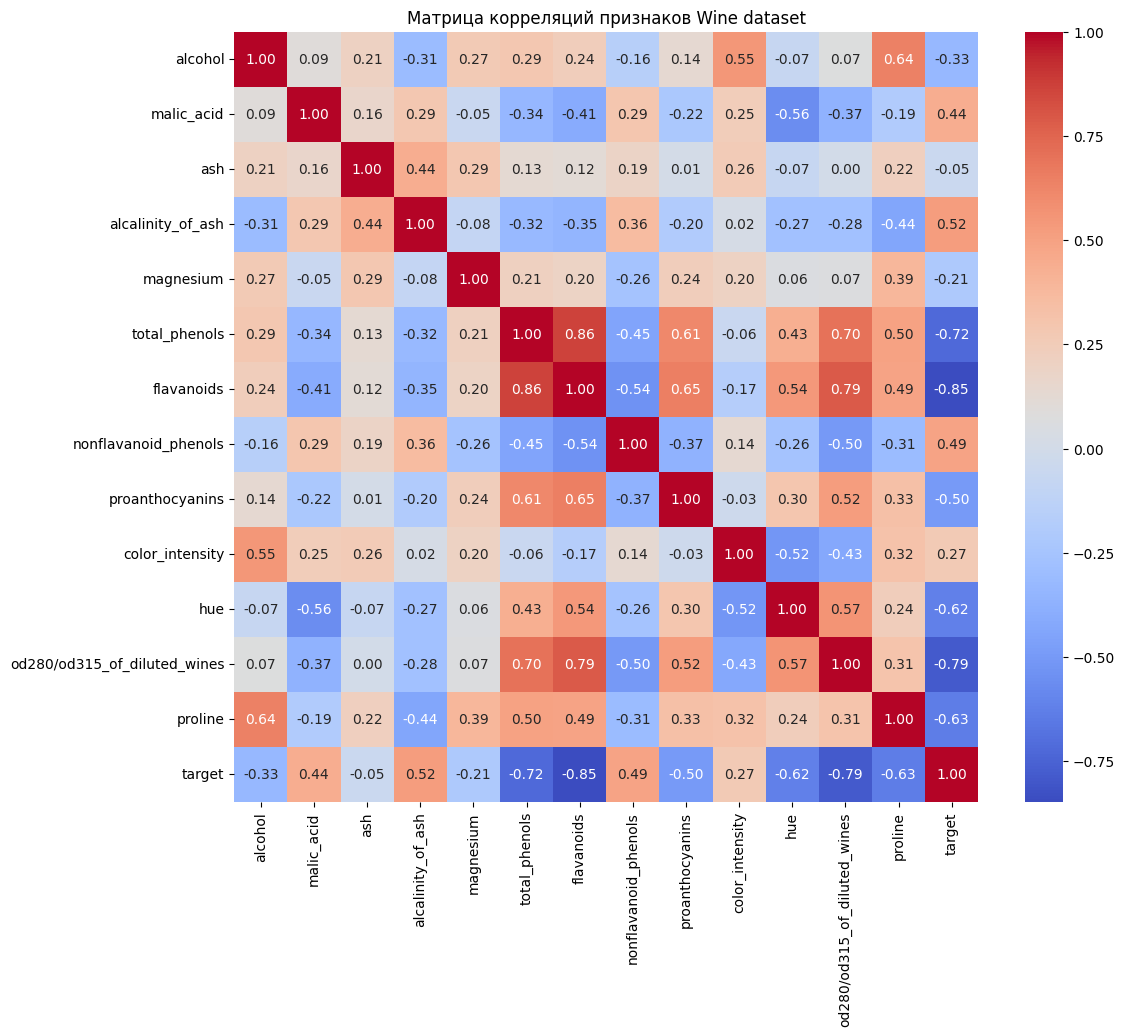


Наиболее коррелированные пары признаков:
flavanoids                    total_phenols                   0.864564
target                        flavanoids                      0.847498
od280/od315_of_diluted_wines  target                          0.788230
flavanoids                    od280/od315_of_diluted_wines    0.787194
total_phenols                 target                          0.719163
                              od280/od315_of_diluted_wines    0.699949
flavanoids                    proanthocyanins                 0.652692
proline                       alcohol                         0.643720
                              target                          0.633717
hue                           target                          0.617369
dtype: float64


In [3]:
# Построение матрицы корреляций
plt.figure(figsize=(12, 10))
correlation_matrix = wine_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Матрица корреляций признаков Wine dataset")
plt.show()

# Вывод наиболее коррелированных признаков
high_corr = correlation_matrix.abs().unstack().sort_values(ascending=False)
high_corr = high_corr[high_corr != 1].drop_duplicates()
print("\nНаиболее коррелированные пары признаков:")
print(high_corr.head(10))

4. Парные диаграммы (pairplot)

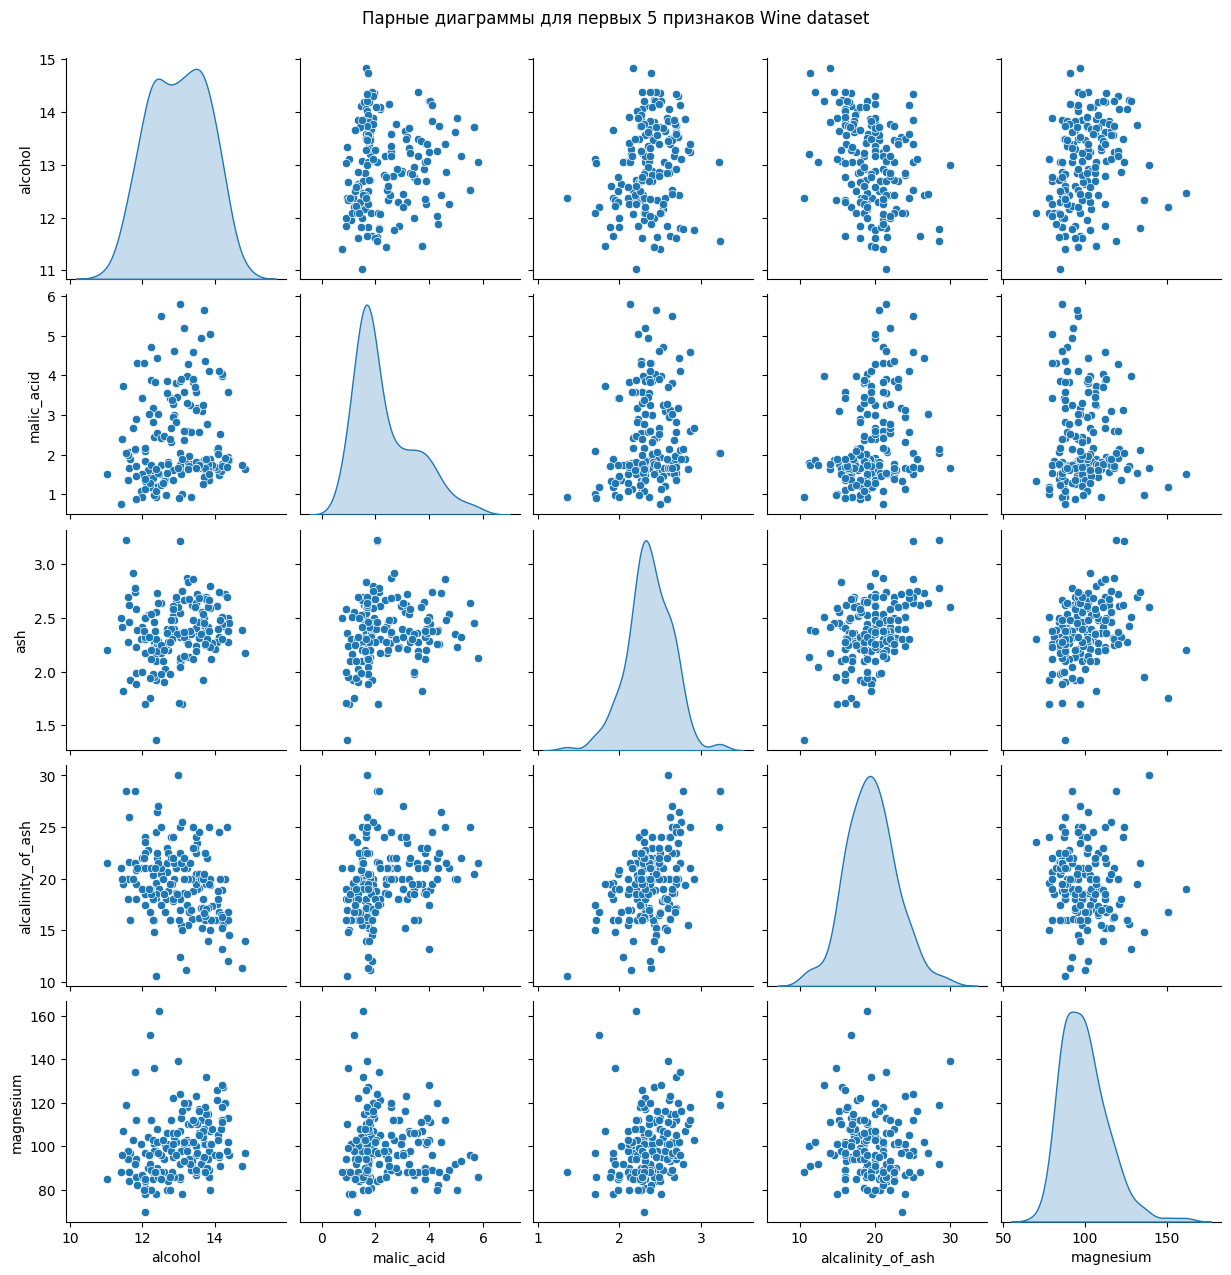

In [4]:
# Построение парных диаграмм для первых 5 признаков (чтобы не перегружать визуализацию)
sns.pairplot(wine_df.iloc[:, :5], diag_kind='kde')
plt.suptitle("Парные диаграммы для первых 5 признаков Wine dataset", y=1.02)
plt.show()

    Качество данных: В наборе данных отсутствуют пропущенные значения, что позволяет использовать все имеющиеся наблюдения для анализа и построения моделей.

    Корреляционный анализ:

        Наибольшая положительная корреляция наблюдается между total_phenols и flavanoids (0.86), что логично, так как флавоноиды являются подклассом фенолов.

        Сильная положительная корреляция также между flavanoids и od280/od315_of_diluted_wines (0.79).

        Отрицательные корреляции наиболее выражены между hue и color_intensity (-0.52).

    Парные диаграммы:

        Позволяют визуально оценить распределения признаков и их взаимосвязи.

        Видно, что некоторые признаки имеют близкое к нормальному распределение (например, alcohol), в то время как другие (malic_acid, ash) имеют более сложные распределения.

        На точечных диаграммах можно заметить как линейные, так и нелинейные зависимости между признаками.

    Рекомендации для построения моделей:

        При построении моделей можно рассмотреть удаление одного из сильно коррелированных признаков (например, оставить только flavanoids вместо пары flavanoids и total_phenols), чтобы избежать мультиколлинеарности.

        Набор данных хорошо подходит для задач классификации (предсказание класса вина), так как признаки имеют выраженные различия между классами.

        Наибольший вклад в модель, вероятно, внесут такие признаки как flavanoids, total_phenols, od280/od315_of_diluted_wines, proline и color_intensity, так как они демонстрируют значимые корреляции с другими признаками и, вероятно, с целевой переменной.